In [15]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [6]:
base = pd.read_csv('/Users/zx16649/Downloads/Alzheimer Disease and Healthy Aging Data In US.csv')

/var/folders/f5/nbmczx1j1ys7gbkdlms60m4m0000gq/T/ipykernel_16350/4050667201.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv('/Users/zx16649/Downloads/Alzheimer Disease and Healthy Aging Data In US.csv')


In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

In [8]:
base['Year'] = (base['YearStart']+ base['YearEnd'])//2
base = base.sort_values(['YearStart','LocationAbbr'])
states = base.LocationAbbr.unique()
states

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'MDW', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NRE', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'SOU', 'TN', 'TX', 'US', 'UT', 'VA', 'VT', 'WA',
       'WEST', 'WI', 'WV', 'WY', 'VI'], dtype=object)

In [9]:
grouped = base.groupby(['Year','Question','StratificationID1','StratificationID2']).agg(lambda x: list(x))

In [12]:
def get_value(state,a,b):#return the values if a state exists in the data
    if not (state in a):
        return np.nan
    for i,s in enumerate(a):
        if state==s:
            return b[i]
for state in states:
    grouped[state] = grouped[['LocationAbbr','Data_Value']].apply(lambda x: get_value(state,a = x['LocationAbbr'], b = x['Data_Value']), axis=1)

In [19]:
grouped = grouped[states]
# grouped.to_csv('US_Alzheimers_Cleaned_Data.csv')
grouped

AK  \
Year Question                                           StratificationID1 StratificationID2        
2015 Average of 20 or more hours of care per week pr... 5064              ASN                NaN   
                                                                          BLK                NaN   
                                                                          FEMALE             NaN   
                                                                          HIS                NaN   
                                                                          MALE               NaN   
...                                                                                          ...   
2020 Physically unhealthy days (mean number of days ... AGE_OVERALL       HIS                NaN   
                                                                          MALE               3.1   
                                                                          NAA                4.6   
                                                                          OVERALL            3.9   
                                                                          WHT                4.0   

                                                                                               AL  \
Year Question                                           StratificationID1 StratificationID2         
2015 Average of 20 or more hours of care per week pr... 5064              ASN                 NaN   
                                                                          BLK                35.8   
                                                                          FEMALE             35.3   
                                                                          HIS                 NaN   
                                                                          MALE               25.6   
...                                                                                           ...   
2020 Physically unhealthy days (mean number of days ... AGE_OVERALL       HIS                 NaN   
                                                                          MALE                4.7   
                                                                          NAA                 NaN   
                                                                          OVERALL             5.0   
                                                                          WHT                 5.0   

                                                                                              AR  \
Year Question                                           StratificationID1 StratificationID2        
2015 Average of 20 or more hours of care per week pr... 5064              ASN                NaN   
                                                                          BLK                NaN   
                                                                          FEMALE             NaN   
                                                                          HIS                NaN   
                                                                          MALE               NaN   
...                                                                                          ...   
2020 Physically unhealthy days (mean number of days ... AGE_OVERALL       HIS                NaN   
                                                                          MALE               5.6   
                                                                          NAA                NaN   
                                                                          OVERALL            6.0   
                                                                          WHT                5.9   

                                                                                              AZ  \
Year Question                                           StratificationID1 Stra

In [91]:
base = base.sort_values(by='Class')

In [94]:


gender = base[(base['StratificationCategory2'] =='Gender')& (base['StratificationID1']=='AGE_OVERALL')]
gender

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Year
139756,2020,2020,NRE,Northeast,BRFSS,Caregiving,Intensity of caregiving among older adults,Average of 20 or more hours of care per week p...,%,PRCTG,Percentage,31.1,31.1,24.8,38.1,NaN,Age Group,Overall,Gender,Male,NaN,C07,TGC04,Q39,9001,AGE,AGE_OVERALL,GENDER,MALE,2020
105000,2015,2020,MT,Montana,BRFSS,Caregiving,Duration of caregiving among older adults,Percentage of older adults who provided care t...,%,PRCTG,Percentage,66.6,66.6,60.2,72.4,NaN,Age Group,Overall,Gender,Female,POINT (-109.4244206 47.06652897),C07,TGC03,Q38,30,AGE,AGE_OVERALL,GENDER,FEMALE,2017
141583,2017,2017,NRE,Northeast,BRFSS,Caregiving,Duration of caregiving among older adults,Percentage of older adults who provided care t...,%,PRCTG,Percentage,71.4,71.4,65.7,76.4,NaN,Age Group,Overall,Gender,Male,NaN,C07,TGC03,Q38,9001,AGE,AGE_OVERALL,GENDER,MALE,2017
104854,2015,2020,MT,Montana,BRFSS,Caregiving,Provide care for a friend or family member in ...,Percentage of older adults who provided care f...,%,PRCTG,Percentage,22.5,22.5,20.0,25.2,NaN,Age Group,Overall,Gender,Female,POINT (-109.4244206 47.06652897),C07,TGC01,Q36,30,AGE,AGE_OVERALL,GENDER,FEMALE,2017
105055,2015,2020,MT,Montana,BRFSS,Caregiving,Expect to provide care for someone in the next...,Percentage of older adults currently not provi...,%,PRCTG,Percentage,16.2,16.2,13.7,19.1,NaN,Age Group,Overall,Gender,Female,POINT (-109.4244206 47.06652897),C07,TGC02,Q37,30,AGE,AGE_OVERALL,GENDER,FEMALE,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54659,2017,2017,IL,Illinois,BRFSS,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,%,PRCTG,Percentage,17.8,17.8,15.3,20.5,NaN,Age Group,Overall,Gender,Male,POINT (-88.99771018 40.48501028),C04,TAC03,Q21,17,AGE,AGE_OVERALL,GENDER,MALE,2017
160216,2015,2015,RI,Rhode Island,BRFSS,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,%,PRCTG,Percentage,6.2,6.2,4.8,7.8,NaN,Age Group,Overall,Gender,Female,POINT (-71.52247031 41.70828019),C04,TAC03,Q21,44,AGE,AGE_OVERALL,GENDER,FEMALE,2015
80774,2020,2020,MDW,Midwest,BRFSS,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,%,PRCTG,Percentage,14.4,14.4,13.6,15.2,NaN,Age Group,Overall,Gender,Male,NaN,C04,TAC03,Q21,9002,AGE,AGE_OVERALL,GENDER,MALE,2020
50434,2017,2017,IL,Illinois,BRFSS,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,%,PRCTG,Percentage,13.2,13.2,11.4,15.2,NaN,Age Group,Overall,Gender,Female,POINT (-88.99771018 40.48501028),C04,TAC01,Q17,17,AGE,AGE_OVERALL,GENDER,FEMALE,2017


In [110]:
filtered_df = gender.dropna(subset=['Data_Value'])
mean_by_group = filtered_df.groupby(['Class','Question','Stratification2'])['Data_Value'].mean().reset_index()
mean_by_group

,Class,Question,Stratification2,Data_Value
0,Caregiving,Average of 20 or more hours of care per week p...,Female,33.639752
1,Caregiving,Average of 20 or more hours of care per week p...,Male,27.942236
2,Caregiving,Percentage of older adults currently not provi...,Female,16.864151
3,Caregiving,Percentage of older adults currently not provi...,Male,14.583019
4,Caregiving,Percentage of older adults who provided care f...,Female,24.977019
5,Caregiving,Percentage of older adults who provided care f...,Male,19.273913
6,Caregiving,Percentage of older adults who provided care f...,Female,16.482803
7,Caregiving,Percentage of older adults who provided care f...,Male,14.785417
8,Caregiving,Percentage of older adults who provided care t...,Female,71.950932
9,Caregiving,Percentage of older adults who provided care t...,Male,71.776398


In [111]:
value_to_remove = 'Percentage of older adult women who have received a mammogram within the past 2 years'
filtered_df = mean_by_group[(mean_by_group['Question'] != 'Percentage of older adult women who have received a mammogram within the past 2 years')&(mean_by_group['Question'] != 'Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years')]
filtered_df.at[56, 'Question'] = 'Percentage of older adult who are up to date with select clinical preventive services'
filtered_df.at[57, 'Question'] = 'Percentage of older adult who are up to date with select clinical preventive services'
print(filtered_df)

                                  Class  \
0                            Caregiving   
1                            Caregiving   
2                            Caregiving   
3                            Caregiving   
4                            Caregiving   
5                            Caregiving   
6                            Caregiving   
7                            Caregiving   
8                            Caregiving   
9                            Caregiving   
10                    Cognitive Decline   
11                    Cognitive Decline   
12                    Cognitive Decline   
13                    Cognitive Decline   
14                    Cognitive Decline   
15                    Cognitive Decline   
16                    Cognitive Decline   
17                    Cognitive Decline   
18                        Mental Health   
19                        Mental Health   
20                        Mental Health   
21                        Mental Health   
22  Nutriti

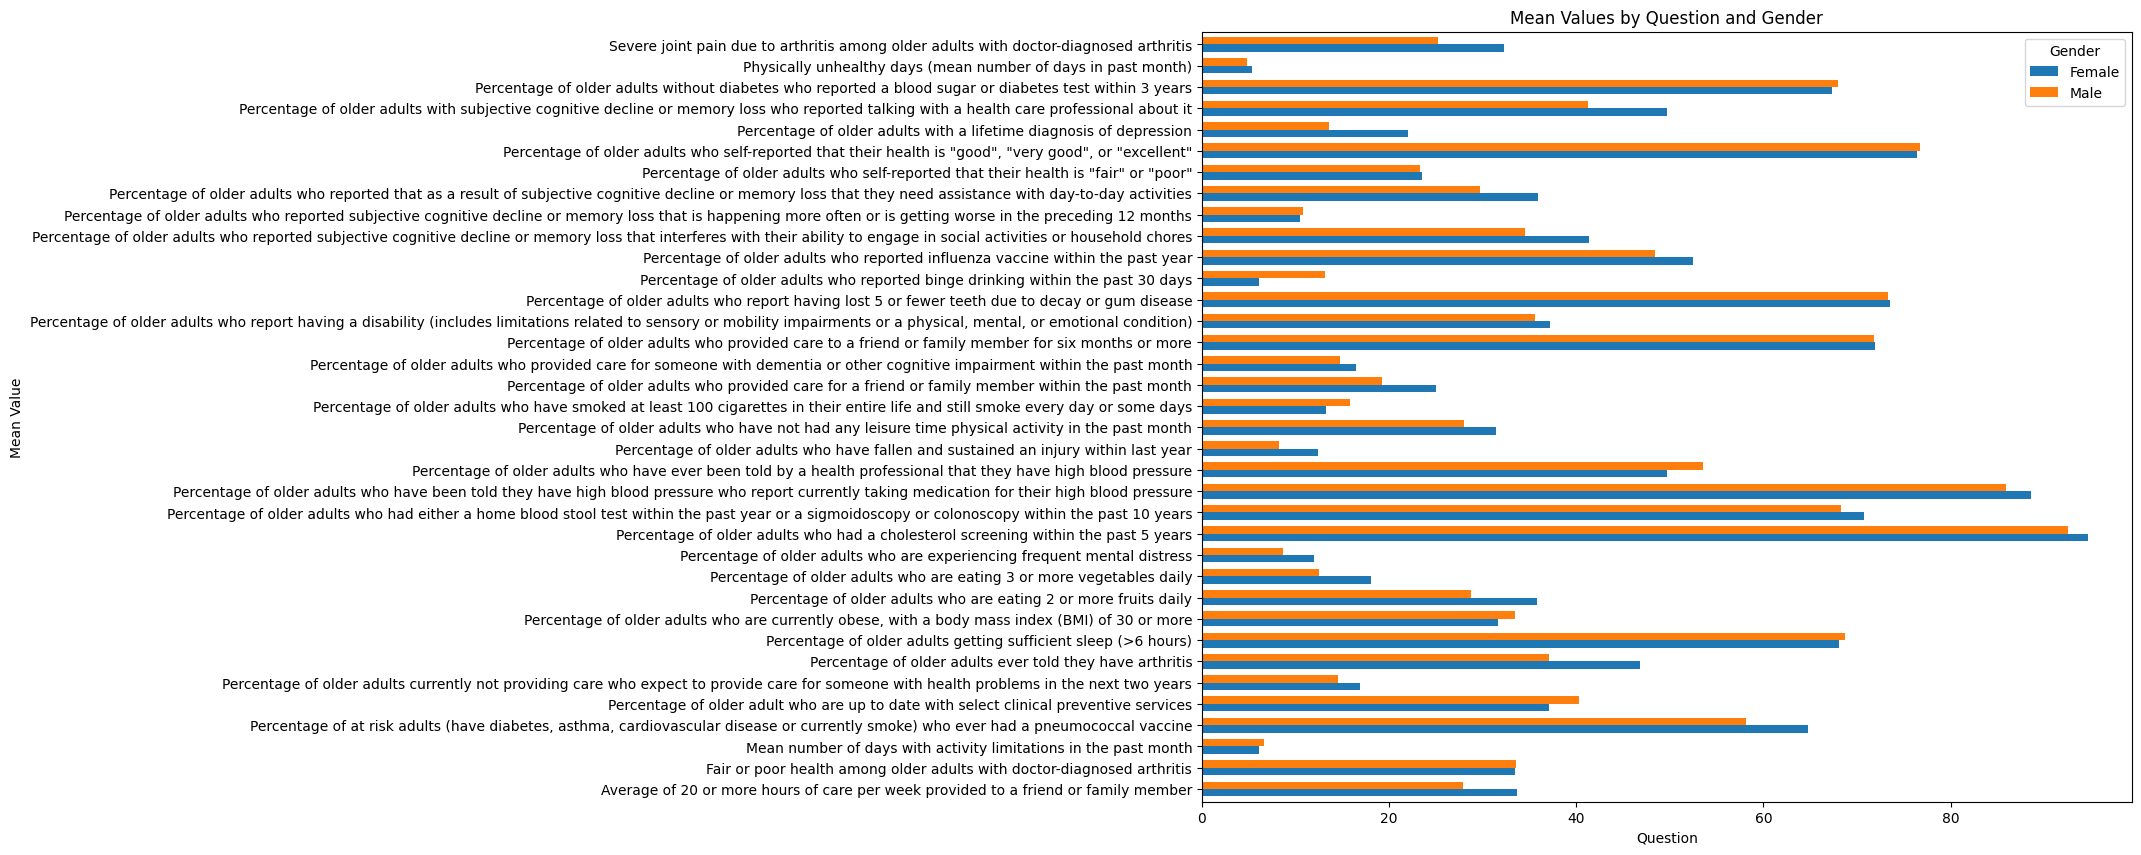

In [112]:
pivot_df = filtered_df.pivot(index='Question', columns='Stratification2', values='Data_Value')

fig, ax = plt.subplots(figsize=(12, 10))  # Set the figure width (8 inches wide, 6 inches tall)
width = 0.7  # Set the bar width (0.5)
# Plot the mean values in a bar chart
pivot_df.plot(kind='barh',width=width, ax=ax)

group_colors = {'Caregiving': 'red', 'Cognitive Decline': 'blue', }
for i, group in enumerate(pivot_df.index):
    ax.tick_params(axis='y', labelcolor=group_colors[group], labelleft=False)
    
plt.xlabel('Question')
plt.ylabel('Mean Value')
plt.title('Mean Values by Question and Gender')
plt.legend(title='Gender')
plt.show()

In [65]:
ethnicity = base[(base['StratificationCategory2'] =='Race/Ethnicity')& (base['StratificationID1']=='AGE_OVERALL')]
ethnicity

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Year
38,2015,2015,AK,Alaska,BRFSS,Screenings and Vaccines,Influenza vaccine within past year,Percentage of older adults who reported influe...,%,PRCTG,Percentage,40.3,40.3,31.4,50.0,NaN,Age Group,Overall,Race/Ethnicity,Native Am/Alaskan Native,POINT (-147.722059 64.84507996),C03,TSC08,Q18,2,AGE,AGE_OVERALL,RACE,NAA,2015
292,2015,2015,AK,Alaska,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-147.722059 64.84507996),C05,TMC03,Q27,2,AGE,AGE_OVERALL,RACE,HIS,2015
297,2015,2015,AK,Alaska,BRFSS,Screenings and Vaccines,High blood pressure ever,Percentage of older adults who have ever been ...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Asian/Pacific Islander,POINT (-147.722059 64.84507996),C03,TSC07,Q22,2,AGE,AGE_OVERALL,RACE,ASN,2015
452,2015,2015,AK,Alaska,BRFSS,Overall Health,Taking medication for high blood pressure,Percentage of older adults who have been told ...,%,PRCTG,Percentage,76.5,76.5,71.6,80.8,NaN,Age Group,Overall,Race/Ethnicity,"White, non-Hispanic",POINT (-147.722059 64.84507996),C01,TOC04,Q04,2,AGE,AGE_OVERALL,RACE,WHT,2015
487,2015,2015,AK,Alaska,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Asian/Pacific Islander,POINT (-147.722059 64.84507996),C01,TOC07,Q32,2,AGE,AGE_OVERALL,RACE,ASN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213012,2020,2020,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,AGE_OVERALL,RACE,HIS,2020
213593,2020,2020,WY,Wyoming,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C01,TOC11,Q43,56,AGE,AGE_OVERALL,RACE,ASN,2020
214004,2020,2020,WY,Wyoming,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C01,TOC11,Q43,56,AGE,AGE_OVERALL,RACE,NAA,2020
214163,2020,2020,WY,Wyoming,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,"Black, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC11,Q43,56,AGE,AGE_OVERALL,RACE,BLK,2020


In [66]:
filtered_df = ethnicity.dropna(subset=['Data_Value'])
mean_by_group_ethnicity = filtered_df.groupby(['Question','Stratification2'])['Data_Value'].mean().reset_index()
mean_by_group_ethnicity

,Question,Stratification2,Data_Value
0,Average of 20 or more hours of care per week p...,Asian/Pacific Islander,37.270270
1,Average of 20 or more hours of care per week p...,"Black, non-Hispanic",35.011111
2,Average of 20 or more hours of care per week p...,Hispanic,41.907692
3,Average of 20 or more hours of care per week p...,Native Am/Alaskan Native,41.713158
4,Average of 20 or more hours of care per week p...,"White, non-Hispanic",29.327044
5,Fair or poor health among older adults with do...,Asian/Pacific Islander,29.165517
6,Fair or poor health among older adults with do...,"Black, non-Hispanic",43.347651
7,Fair or poor health among older adults with do...,Hispanic,53.168041
8,Fair or poor health among older adults with do...,Native Am/Alaskan Native,50.352632
9,Fair or poor health among older adults with do...,"White, non-Hispanic",29.494170


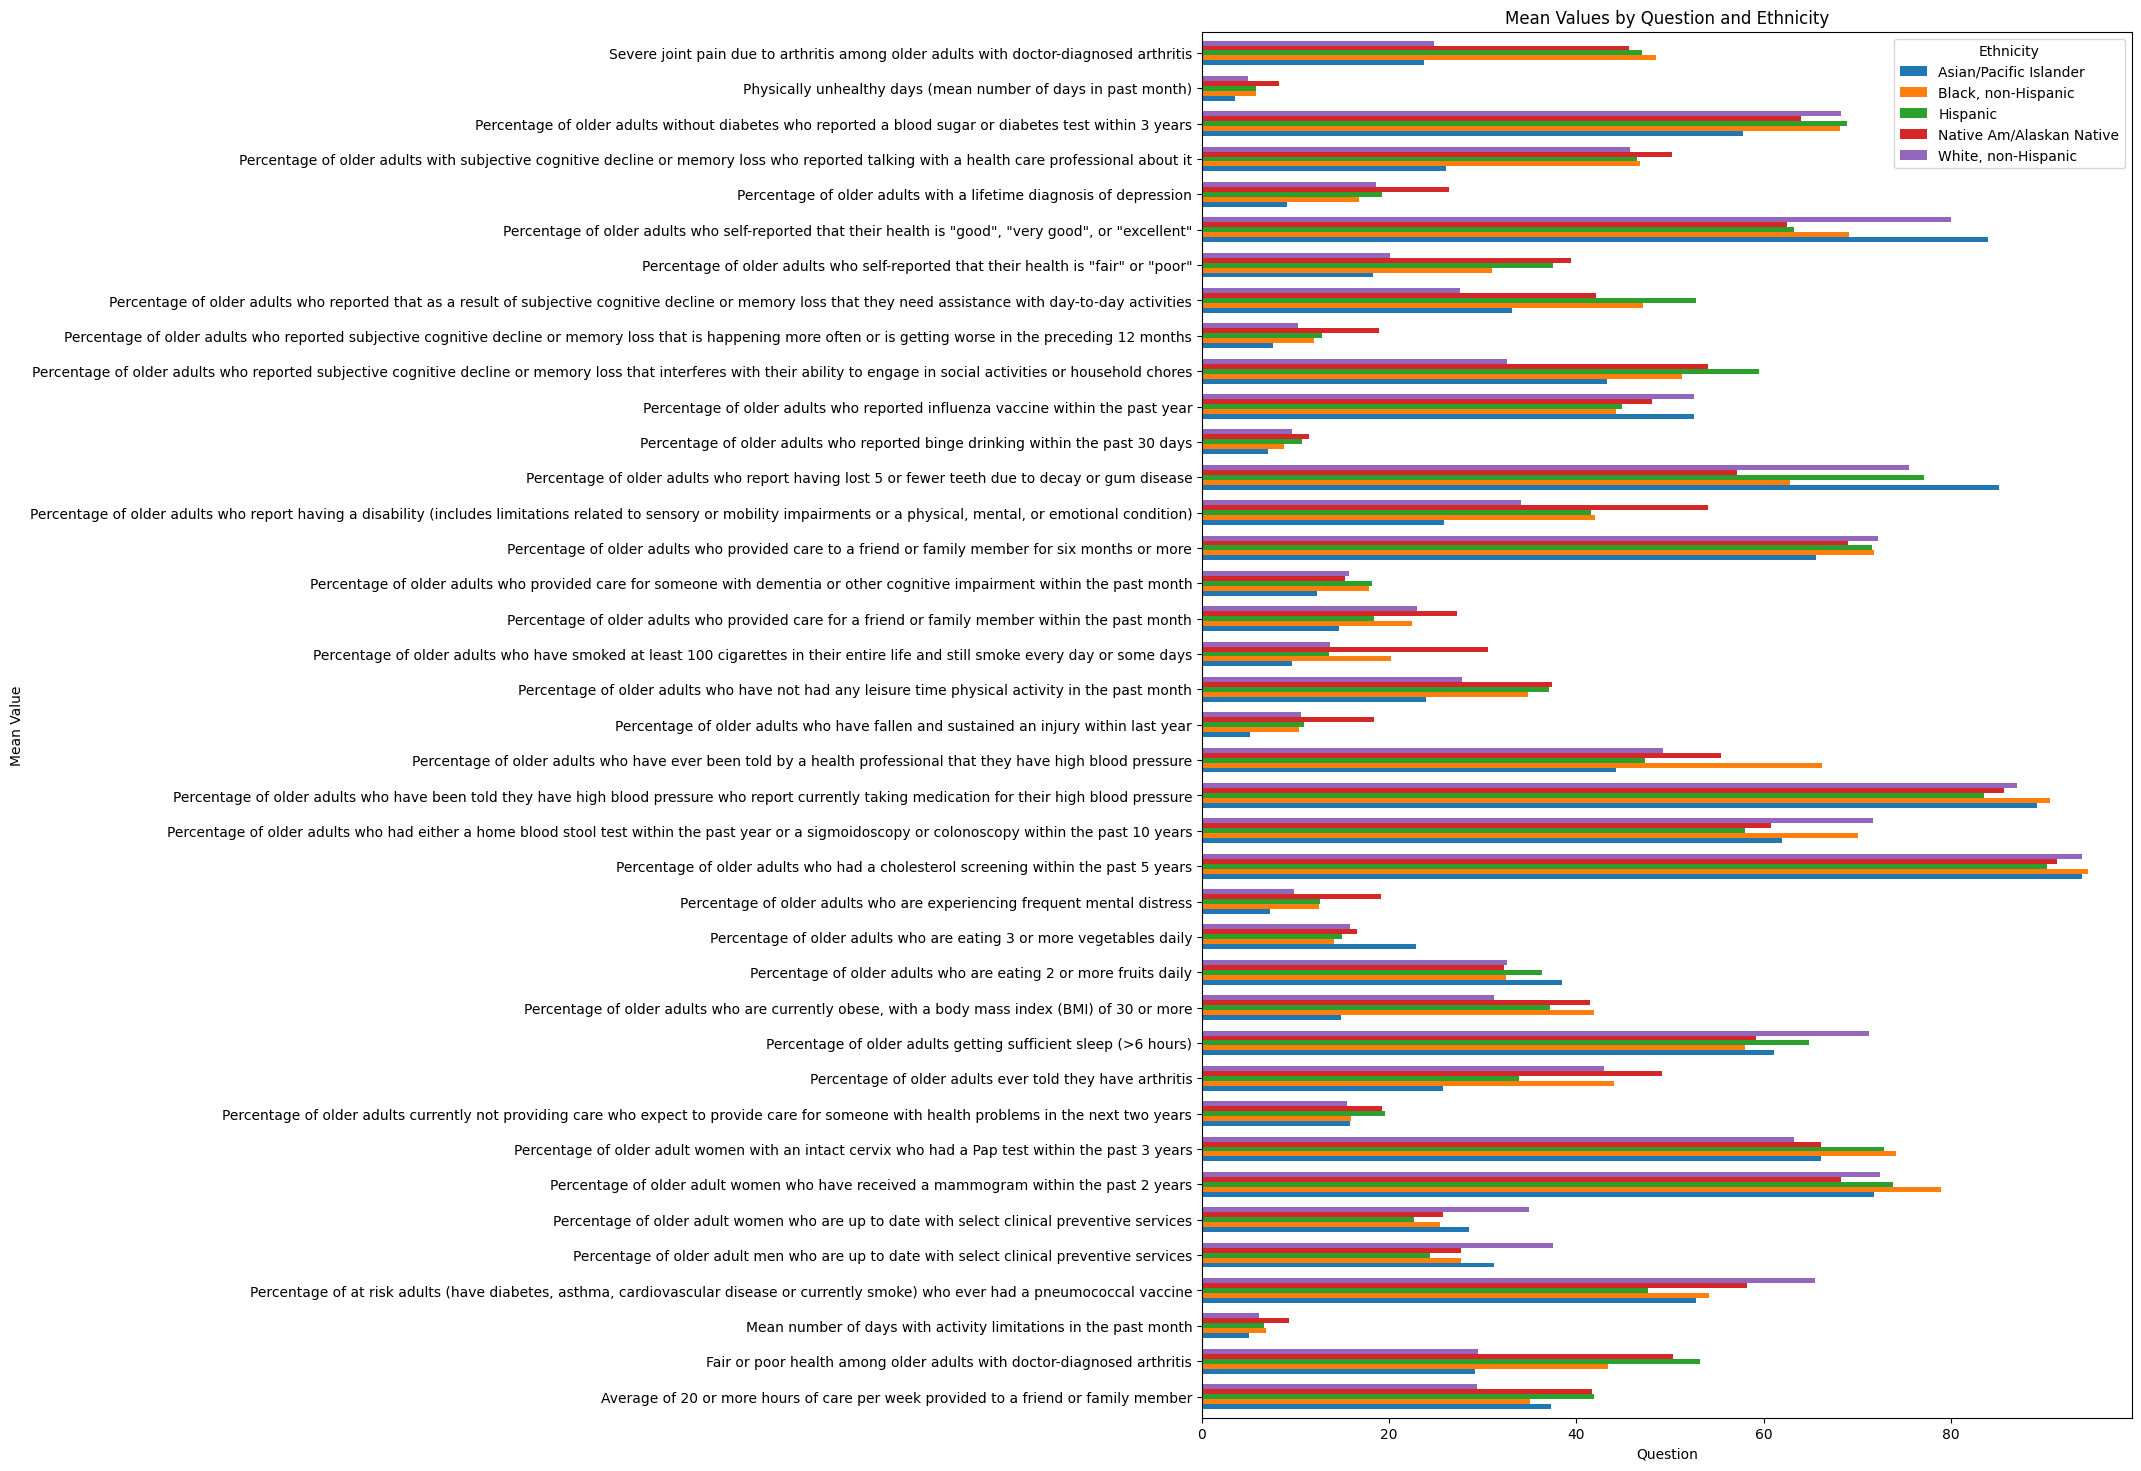

In [106]:
pivot_df = mean_by_group_ethnicity.pivot(index='Question', columns='Stratification2', values='Data_Value')


fig, ax = plt.subplots(figsize=(12, 18))  # Set the figure width (8 inches wide, 6 inches tall)
width = 0.7  # Set the bar width (0.5)

# Plot the mean values in a bar chart
pivot_df.plot(kind='barh', width=width, ax=ax)
plt.xlabel('Question')
plt.ylabel('Mean Value')
plt.title('Mean Values by Question and Ethnicity')
plt.legend(title='Ethnicity')
plt.show()

In [76]:
age = base[(base['StratificationID1'] =='5064') | (base['StratificationID1']=='65PLUS')]
age

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Year
37,2015,2015,AK,Alaska,BRFSS,Screenings and Vaccines,Ever had pneumococcal vaccine,"Percentage of at risk adults (have diabetes, a...",%,PRCTG,Percentage,48.1,48.1,36.7,59.7,NaN,Age Group,50-64 years,Gender,Male,POINT (-147.722059 64.84507996),C03,TSC09,Q09,2,AGE,5064,GENDER,MALE,2015
74,2015,2020,AK,Alaska,BRFSS,Caregiving,Duration of caregiving among older adults,Percentage of older adults who provided care t...,%,PRCTG,Percentage,75.9,75.9,63.0,85.3,NaN,Age Group,65 years or older,Gender,Female,POINT (-147.722059 64.84507996),C07,TGC03,Q38,2,AGE,65PLUS,GENDER,FEMALE,2017
117,2015,2015,AK,Alaska,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,Mean,NaN,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Hispanic,POINT (-147.722059 64.84507996),C01,TOC03,Q35,2,AGE,5064,RACE,HIS,2015
130,2015,2020,AK,Alaska,BRFSS,Caregiving,Duration of caregiving among older adults,Percentage of older adults who provided care t...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-147.722059 64.84507996),C07,TGC03,Q38,2,AGE,65PLUS,RACE,NAA,2017
137,2015,2020,AK,Alaska,BRFSS,Caregiving,Intensity of caregiving among older adults,Average of 20 or more hours of care per week p...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Hispanic,POINT (-147.722059 64.84507996),C07,TGC04,Q39,2,AGE,5064,RACE,HIS,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214012,2020,2020,WY,Wyoming,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,31.9,31.9,28.4,35.6,NaN,Age Group,50-64 years,Race/Ethnicity,"White, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC11,Q43,56,AGE,5064,RACE,WHT,2020
214130,2020,2020,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,PRCTG,Percentage,24.5,24.5,19,31,NaN,Age Group,65 years or older,Gender,Male,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,65PLUS,GENDER,MALE,2020
214143,2020,2020,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,PRCTG,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,NAA,2020
214192,2020,2020,WY,Wyoming,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,40.3,40.3,26.2,56.1,NaN,Age Group,50-64 years,Race/Ethnicity,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC11,Q43,56,AGE,5064,RACE,HIS,2020


In [77]:
filtered_df = age.dropna(subset=['Data_Value'])
mean_by_group_age = filtered_df.groupby(['Question','StratificationID1'])['Data_Value'].mean().reset_index()
mean_by_group_age

,Question,StratificationID1,Data_Value
0,Average of 20 or more hours of care per week p...,5064,30.996411
1,Average of 20 or more hours of care per week p...,65PLUS,34.418994
2,Fair or poor health among older adults with do...,5064,36.988937
3,Fair or poor health among older adults with do...,65PLUS,33.836545
4,Mean number of days with activity limitations ...,5064,6.682578
5,Mean number of days with activity limitations ...,65PLUS,6.146686
6,"Percentage of at risk adults (have diabetes, a...",5064,40.958781
7,"Percentage of at risk adults (have diabetes, a...",65PLUS,69.647141
8,Percentage of older adult men who are up to da...,5064,27.409000
9,Percentage of older adult men who are up to da...,65PLUS,42.024694


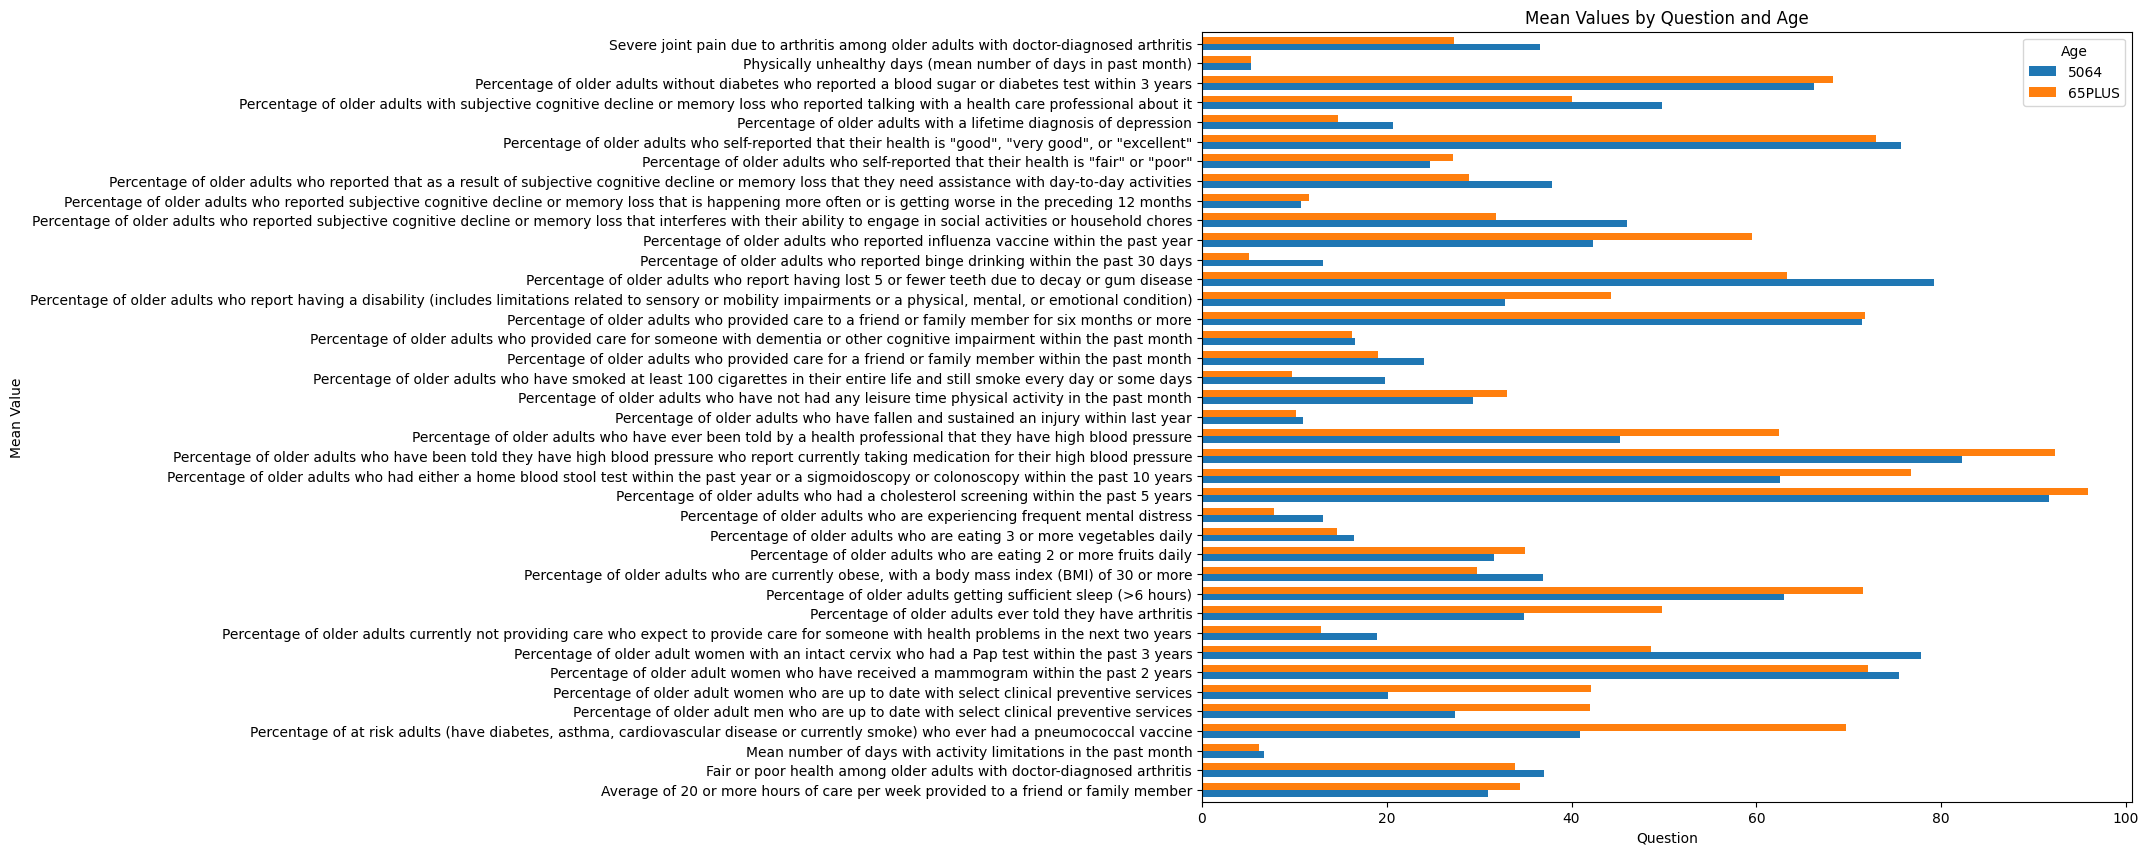

In [104]:
pivot_df = mean_by_group_age.pivot(index='Question', columns='StratificationID1', values='Data_Value')


fig, ax = plt.subplots(figsize=(12, 10))  # Set the figure width (8 inches wide, 6 inches tall)
width = 0.7  # Set the bar width (0.5)

# Plot the mean values in a bar chart
pivot_df.plot(kind='barh',width=width, ax=ax)
plt.xlabel('Question')
plt.ylabel('Mean Value')
plt.title('Mean Values by Question and Age')
plt.legend(title='Age')
plt.show()